In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# traz detalhes das colunas numéricas
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
# mudando nome de coluna
df.rename(columns={'gender': 'Gênero', 'race/ethnicity': 'Raça', 'parental level of education': 'Escolaridade dos pais', 'lunch': 'Almoço',
                   'test preparation course': 'Curso preparatório', 'math score': 'Nota de matematica', 'reading score': 'Nota de leitura',
                   'writing score': 'Nota de escrita'}, inplace= True)
df

,Gênero,Raça,Escolaridade dos pais,Almoço,Curso preparatório,Nota de matematica,Nota de leitura,Nota de escrita
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
#Verificando se tem valores faltantes
valores_null = df.isnull().sum()
valores_null

Gênero                   0
Raça                     0
Escolaridade dos pais    0
Almoço                   0
Curso preparatório       0
Nota de matematica       0
Nota de leitura          0
Nota de escrita          0
dtype: int64

In [9]:
# Qualtidade de feminino e masculino
df['Gênero'].value_counts()

female    518
male      482
Name: Gênero, dtype: int64

<ipython-input-25-f626e095c10a>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cores = plt.cm.get_cmap('Pastel1')


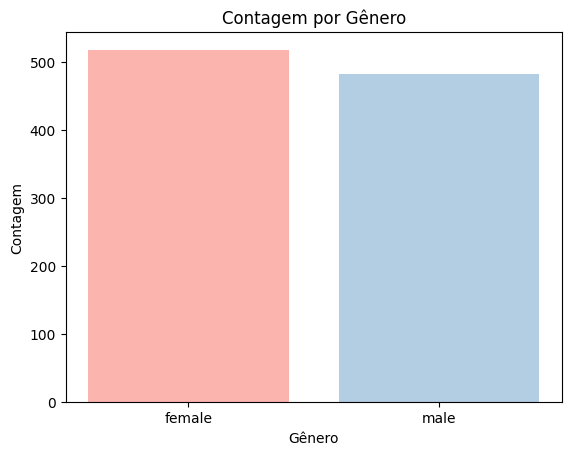

In [25]:
contagem_genero = df['Gênero'].value_counts()
# Define a paleta de cores
cores = plt.cm.get_cmap('Pastel1')

plt.bar(contagem_genero.index, contagem_genero, color=cores(range(len(contagem_genero))))

plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Contagem por Gênero')

plt.show()

In [11]:
df['Raça'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: Raça, dtype: int64

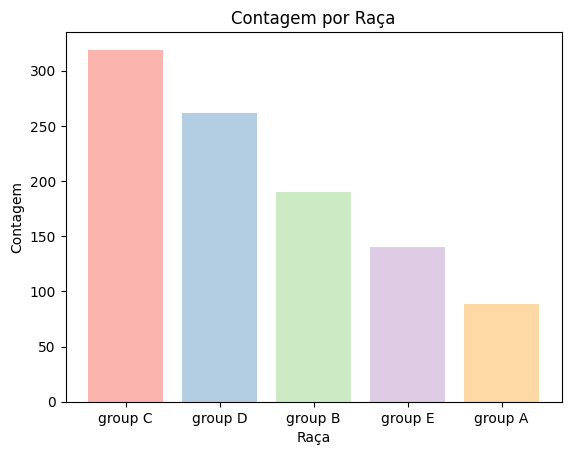

In [26]:
contagem_raça = df['Raça'].value_counts()
plt.bar(contagem_raça.index, contagem_raça, color=cores(range(len(contagem_raça))))

plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.title('Contagem por Raça')

plt.show()

In [13]:
df['Escolaridade dos pais'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Escolaridade dos pais, dtype: int64

<ipython-input-24-63a42ad37560>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cores = plt.cm.get_cmap('Pastel1')


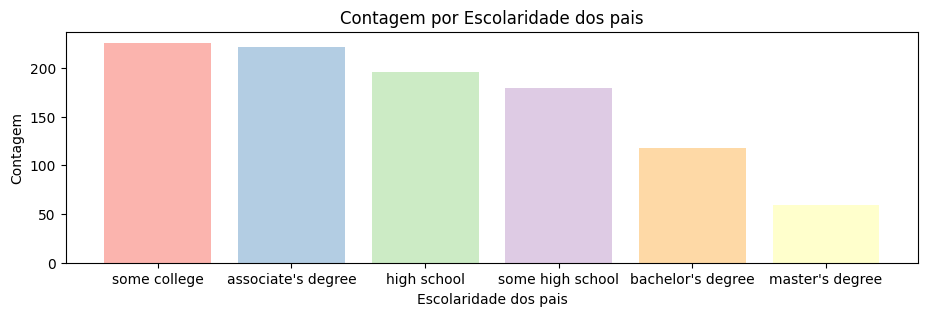

In [24]:
escolaridade = df['Escolaridade dos pais'].value_counts()
plt.figure(figsize=(11, 3))

plt.bar(escolaridade.index, escolaridade, color=cores(range(len(escolaridade))))
plt.xlabel('Escolaridade dos pais')
plt.ylabel('Contagem')
plt.title('Contagem por Escolaridade dos pais')

plt.show()

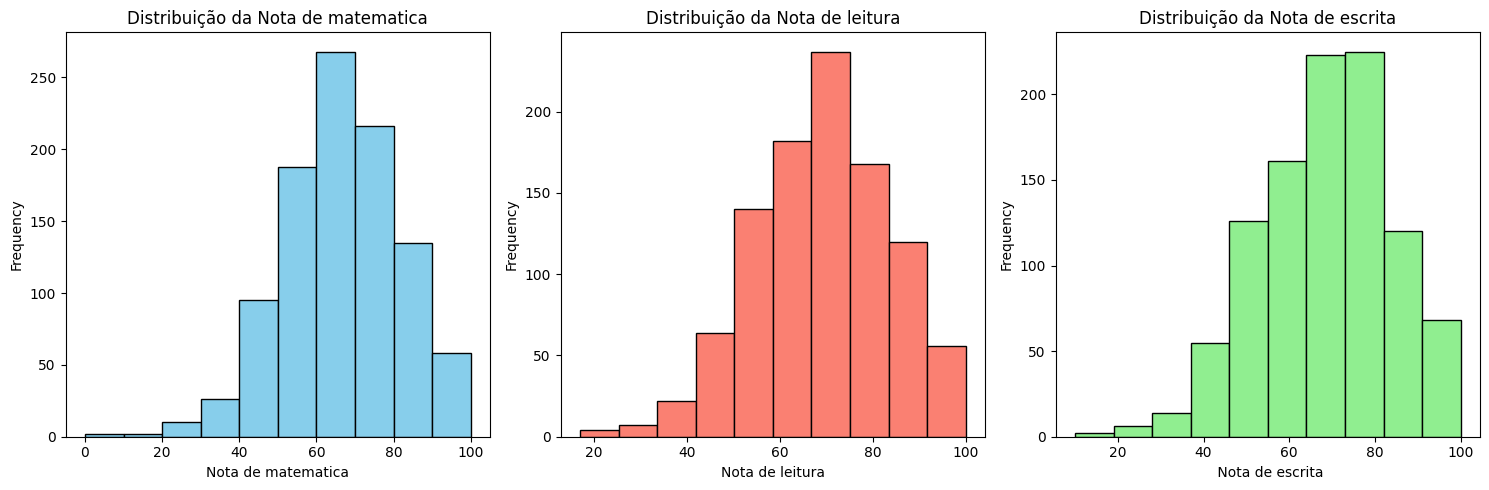

In [30]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.hist(df['Nota de matematica'], color='skyblue', edgecolor='black')
plt.xlabel('Nota de matematica')
plt.ylabel('Frequency')
plt.title('Distribuição da Nota de matematica')

plt.subplot(1, 3, 2)
plt.hist(df['Nota de leitura'], color='salmon', edgecolor='black')
plt.xlabel('Nota de leitura')
plt.ylabel('Frequency')
plt.title('Distribuição da Nota de leitura')

plt.subplot(1, 3, 3)
plt.hist(df['Nota de escrita'], color='lightgreen', edgecolor='black')
plt.xlabel('Nota de escrita')
plt.ylabel('Frequency')
plt.title('Distribuição da Nota de escrita')

plt.tight_layout()
plt.show()

 **Qual a nota média de matemática dos alunos segundo o grau de
escolaridade dos pais?**

In [37]:
media_escolaridade_mat = df.groupby('Escolaridade dos pais')['Nota de matematica'].mean().sort_values(ascending=False)

media_escolaridade_mat


Escolaridade dos pais
master's degree       69.745763
bachelor's degree     69.389831
associate's degree    67.882883
some college          67.128319
some high school      63.497207
high school           62.137755
Name: Nota de matematica, dtype: float64

In [38]:
media_escolaridade_leitura= df.groupby('Escolaridade dos pais')['Nota de leitura'].mean().sort_values(ascending=False)

media_escolaridade_leitura

Escolaridade dos pais
master's degree       75.372881
bachelor's degree     73.000000
associate's degree    70.927928
some college          69.460177
some high school      66.938547
high school           64.704082
Name: Nota de leitura, dtype: float64

In [39]:
media_escolaridade_escrita = df.groupby('Escolaridade dos pais')['Nota de escrita'].mean().sort_values(ascending=False)

media_escolaridade_escrita

Escolaridade dos pais
master's degree       75.677966
bachelor's degree     73.381356
associate's degree    69.896396
some college          68.840708
some high school      64.888268
high school           62.448980
Name: Nota de escrita, dtype: float64

Quanto maior a formação dos pais, maior a nota do aluno

**Verifique gráficamente a relação da nota de leitura e de escrita.**

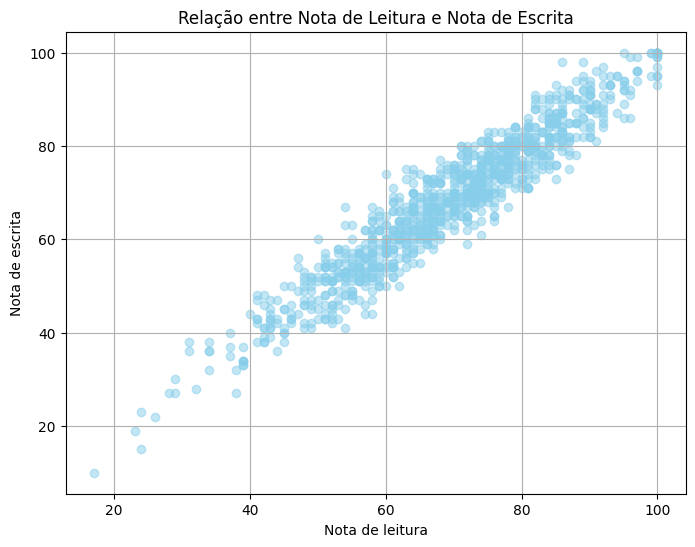

In [54]:
x = df['Nota de leitura']
y = df['Nota de escrita']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='skyblue', alpha=0.5)

plt.xlabel('Nota de leitura')
plt.ylabel('Nota de escrita')
plt.title('Relação entre Nota de Leitura e Nota de Escrita')

plt.grid(True)
plt.show()

A relação da nota de leitura e de escrita é bem parecida